In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter

sns.set_context("talk",rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set_style("whitegrid",{"grid.color": '.9', 'grid.linestyle': '--','axes.edgecolor': '.6', 'xtick.bottom': True,'ytick.left': True})

colorTable = {}
colorTable['k'] = [0,0,0]
colorTable['g'] = [27/255,158/255,119/255]
colorTable['o'] = [217/255,95/255,2/255]

import random

In [3]:
def prime(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        if inverse_composite[i]=='6':
            inverse_composite[i]='9'
        elif inverse_composite[i]=='9':
            inverse_composite[i]='6'
        elif inverse_composite[i].islower():
            inverse_composite[i]=inverse_composite[i].upper()
        elif inverse_composite[i].isupper():
            inverse_composite[i]=inverse_composite[i].lower()
        else:
            raise SyntaxError
    return inverse_composite

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+prime(DNA[site_1-1:site_2])+DNA[site_2:] 

def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
        direction_1, direction_2 = direction_2, direction_1
    
    # Determine which function to use
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return 'DoNotCount'#delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return 'DoNotCount'#delete_between(DNA,num1+1,num2)
        else :
            return 'DoNotCount'
        

    

In [4]:
def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
        direction_1, direction_2 = direction_2, direction_1
    
    # Determine which function to use
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        else :
            return 'DoNotCount'

In [5]:
def probability_calculation(DNA):
    # Dictionary to store counts of each outcome
    outcome_list=[{DNA:1}]

    for _ in range(25):
        outcome_list.append({})
    recombinases_event=  0


    # Run simulations
    for stage in outcome_list:
        if recombinases_event<len(outcome_list)-1:
            recombinases_event+=1      
            for stored_result,probabilities in list(stage.items()):
                stored_result=list(stored_result)
                num_arrows=0
                forward_9_positions=detect_forward_sites(stored_result,['9'])
                backward_6_positions=detect_backward_sites(stored_result,['6'])
                # Randomly select two sites
                combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
                if len(combined)>=2:
                    for i in range(len(combined)):
                        for j in range(i+1,len(combined)):
                            num_arrows+=1

                    for i in range(len(combined)):
                        for j in range(i+1,len(combined)):
                            choice1,choice2 = combined[i], combined[j]
                            
                    
                            output = evaluate_colour_CRE(stored_result,choice1,choice2)
                            while output=='DoNotCount':
                                output=evaluate_colour_CRE(stored_result,choice1,choice2)
                            
                            if output!='DoNotCount':
                                formatted_output = "".join(output)
                                print(formatted_output)#!!!Remove before flight  
                                if formatted_output not in outcome_list[recombinases_event]:
                                    outcome_list[recombinases_event][formatted_output] = 0
                                    outcome_list[recombinases_event][formatted_output] += probabilities/num_arrows
                                else:    
                                    outcome_list[recombinases_event][formatted_output] += probabilities/num_arrows
        print('stage',recombinases_event,'completed')
    return outcome_list

In [6]:
initial_dna_sequence = "A9B6C9D6E9F6G9H6I9J6K"
numberofevents = 20
DNA = initial_dna_sequence

# outcome_lists= probability_calculation(initial_dna_sequence)

outcome_list=[]

for _ in range(numberofevents):
    outcome_list.append(Counter())
recombinases_event=  0

outcome_list[0][DNA] = 1

# Stage 1
for whichstage in range(1,numberofevents):
    stage = outcome_list[whichstage-1]
    for dna,probs in stage.items():
        # Now work out all the things the recombinases can do
        forward_9_positions=detect_forward_sites(list(dna),['9'])
        backward_6_positions=detect_backward_sites(list(dna),['6'])
        combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
        recombinase_acted = 0
        thisinput = Counter()
        for i in range(len(combined)):
            for j in range(i+1,len(combined)):
                choice1,choice2 = combined[i], combined[j]
                
                output = evaluate_colour_CRE(list(dna),choice1,choice2)

                if output!='DoNotCount':
                    recombinase_acted += 1
                    formatted_output = "".join(output)

                    # print(f"stage {whichstage} dna {dna} recombinase {recombinase_acted} output: {formatted_output}")  # !!!Remove before flight

                    thisinput[formatted_output] +=1

        if recombinase_acted==0:
            normfactor = 1
            thisinput[dna] = 1
        else:
            normfactor = recombinase_acted
        
        for key in thisinput:
            outcome_list[whichstage][key] += thisinput[key]*probs/normfactor
    print(f"Stage {whichstage} has {len(outcome_list[whichstage])} outcomes")

Stage 1 has 35 outcomes
Stage 2 has 346 outcomes
Stage 3 has 2024 outcomes
Stage 4 has 9214 outcomes
Stage 5 has 34695 outcomes
Stage 6 has 110324 outcomes
Stage 7 has 285443 outcomes
Stage 8 has 546883 outcomes
Stage 9 has 723105 outcomes
Stage 10 has 758793 outcomes
Stage 11 has 760935 outcomes
Stage 12 has 760969 outcomes
Stage 13 has 760970 outcomes
Stage 14 has 760970 outcomes
Stage 15 has 760970 outcomes
Stage 16 has 760970 outcomes
Stage 17 has 760970 outcomes
Stage 18 has 760970 outcomes
Stage 19 has 760970 outcomes


In [7]:
# Visualisation function to plot ranked probability distributions after each recombination event


def plot_ranked_probabilities(outcome_list):
    for stage in range(len(outcome_list)):
        probs = np.array(sorted(outcome_list[stage].values(), reverse=True))
        ranks = np.arange(1, len(probs) + 1)
        
        # Create a single figure with 1 row and 3 columns of subplots
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        fig.suptitle(f'Stage {stage}: Ranked Probabilities', y=1.05)
        
        # Plot 1: Linear scale
        axes[0].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[0].set_xlabel('Rank')
        axes[0].set_ylabel('Probability')
        axes[0].set_yscale('linear')
        axes[0].set_title('Linear Scale')
        
        # Plot 2: Log-y scale
        axes[1].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[1].set_xlabel('Rank')
        axes[1].set_ylabel('Probability')
        axes[1].set_yscale('log')
        axes[1].set_title('Log-Y Scale')
        
        # Plot 3: Log-log scale
        axes[2].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[2].set_xlabel('Rank')
        axes[2].set_ylabel('Probability')
        axes[2].set_yscale('log')
        axes[2].set_xscale('log')
        axes[2].set_title('Log-Log Scale')
        
        plt.tight_layout()
        plt.show()

In [8]:
# Visualisation function to plot the probabilities sum and entropy of outcomes at each stage
def plot_probabilities(outcome_list, numberofevents=1):    
    probsum = 0
    num_of_possible_outcomes = np.zeros(numberofevents)
    total_num_of_outcomes = np.zeros(numberofevents)
    entropy = np.zeros(numberofevents)
    initial_dict=Counter()
    for stage in range(numberofevents):
        probsum = np.sum(list(outcome_list[stage].values()))
        if (probsum-1)> 0.01 or (probsum-1)<-0.01:
            raise ValueError(f"Stage {stage} does not sum to 1, it sums to {probsum}. Please check the input data or the calculation logic.")
        entropy[stage] = -np.sum([p * np.log2(p) for p in outcome_list[stage].values() if p > 0])
        num_of_possible_outcomes[stage] = len(outcome_list[stage])
        initial_dict.update(outcome_list[stage])
        total_num_of_outcomes[stage] = len(initial_dict)

    # # Plot normalisation
    # plt.figure(figsize=(6, 3))
    # plt.plot(probsum, marker='o', linestyle='-', color='k')
    # plt.xlabel('Stage')
    # plt.ylabel('Sum of Probabilities')
    # #plt.ylim(0, 1.1)

    # Plot number of possible outcomes
    plt.figure(figsize=(6, 3))
    plt.plot(num_of_possible_outcomes, marker='o', linestyle='-', color='b')
    plt.xlabel('Stage')
    plt.ylabel('Number of Possible Outcomes occuring at Each Stage')
    #plt.ylim(0, np.max(num_of_possible_outcomes) * 1.1)

    # Plot number of possible outcomes
    plt.figure(figsize=(6, 3))
    plt.plot(total_num_of_outcomes, marker='o', linestyle='-', color='b')
    plt.xlabel('Stage')
    plt.ylabel('Cumulative of Possible Outcomes at Each Stage')
    #plt.ylim(0, np.max(num_of_possible_outcomes) * 1.1)

    # Plot ranked probabilities
    plot_ranked_probabilities(outcome_list)

    # Plot entropy
    plt.figure(figsize=(6, 3))
    plt.plot(entropy, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Entropy')
    #plt.ylim(0, np.max(entropy) * 1.1)

    


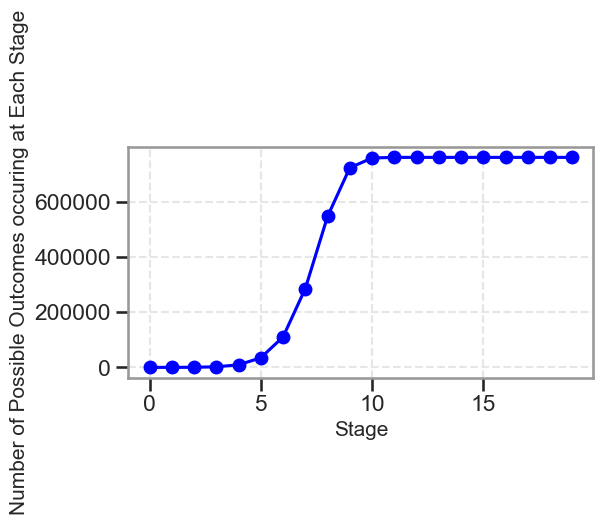

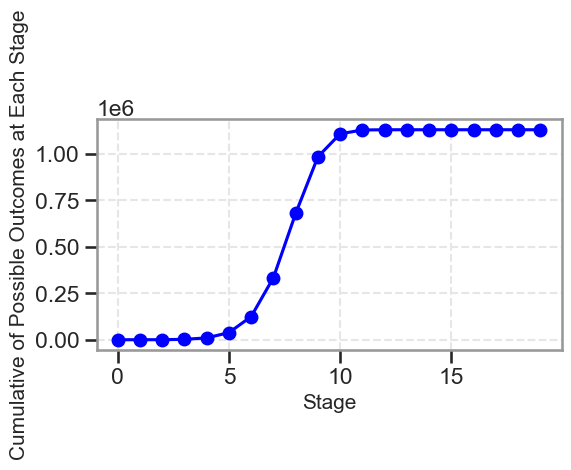

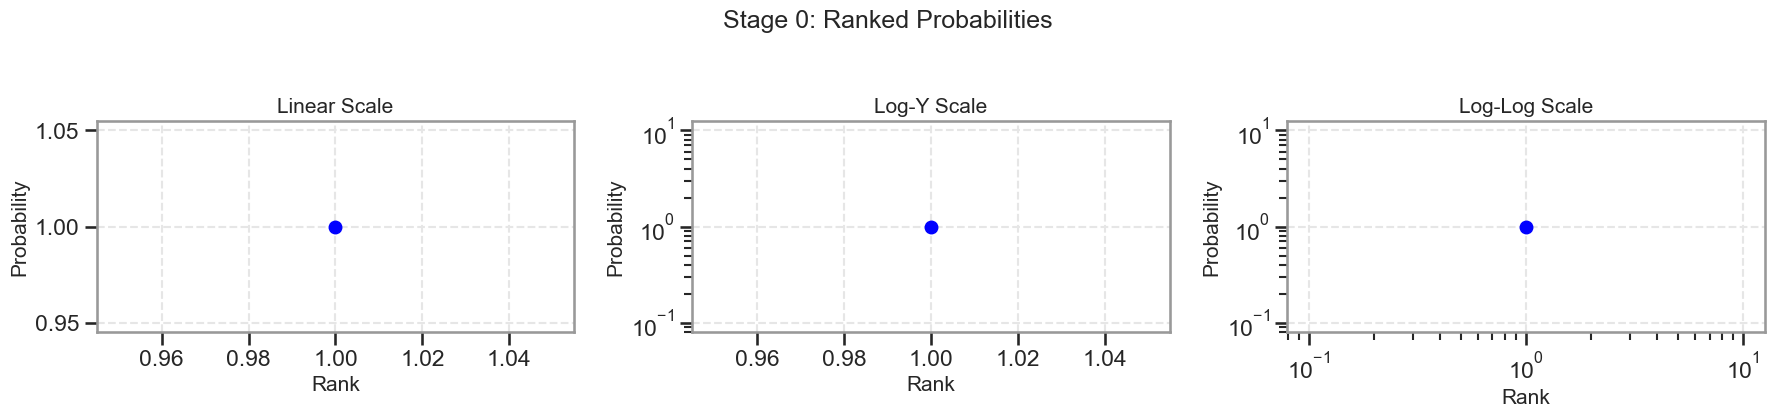

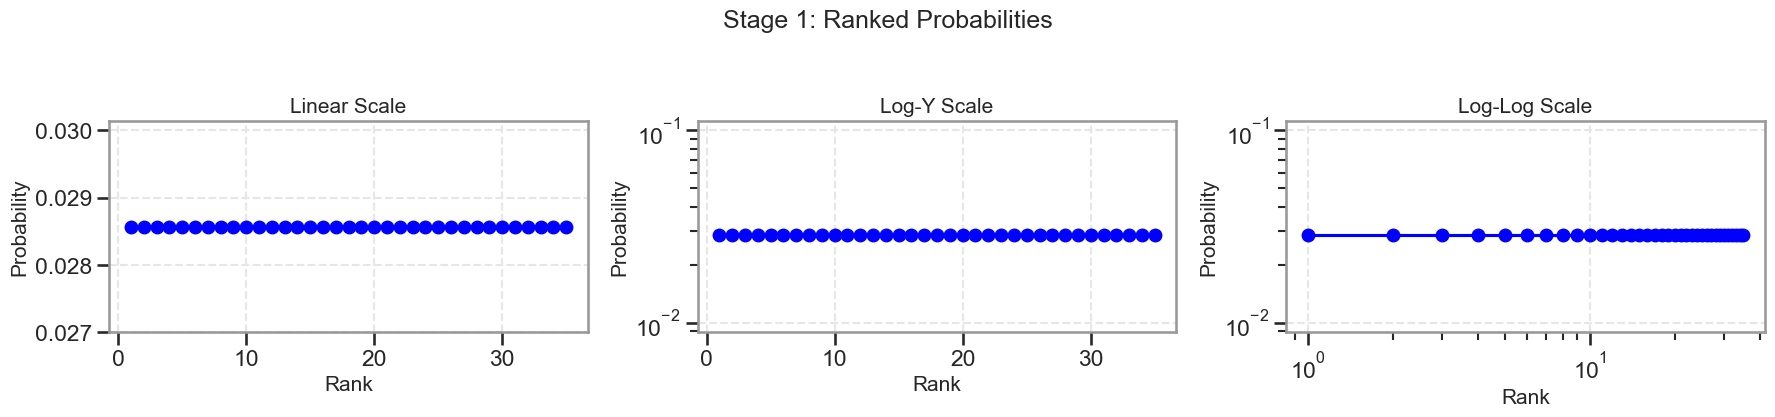

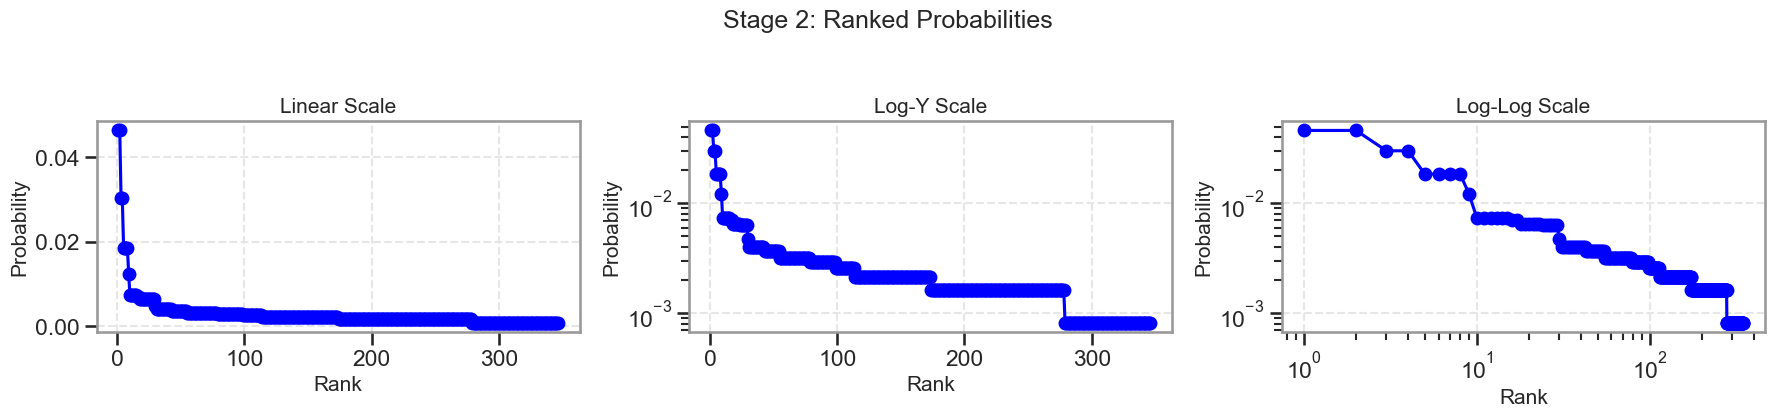

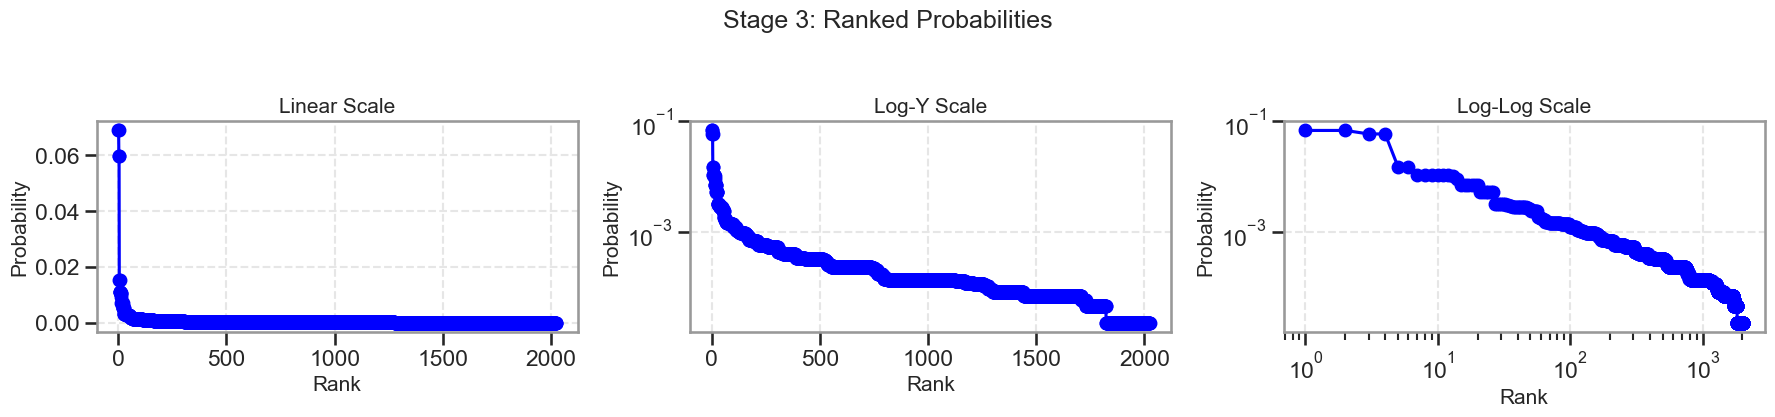

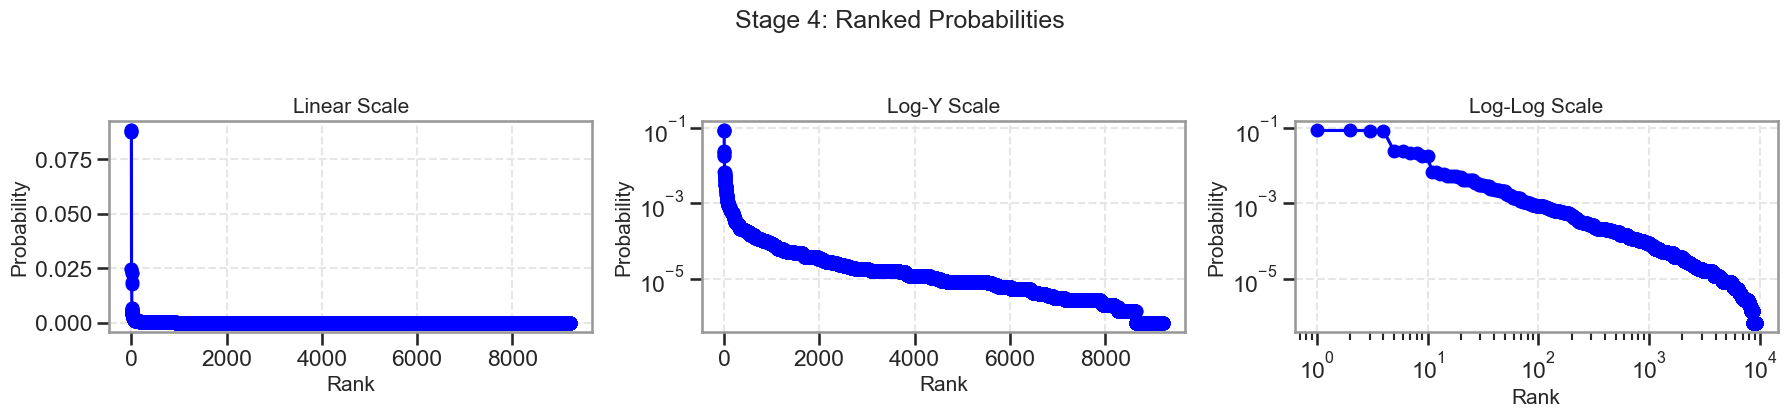

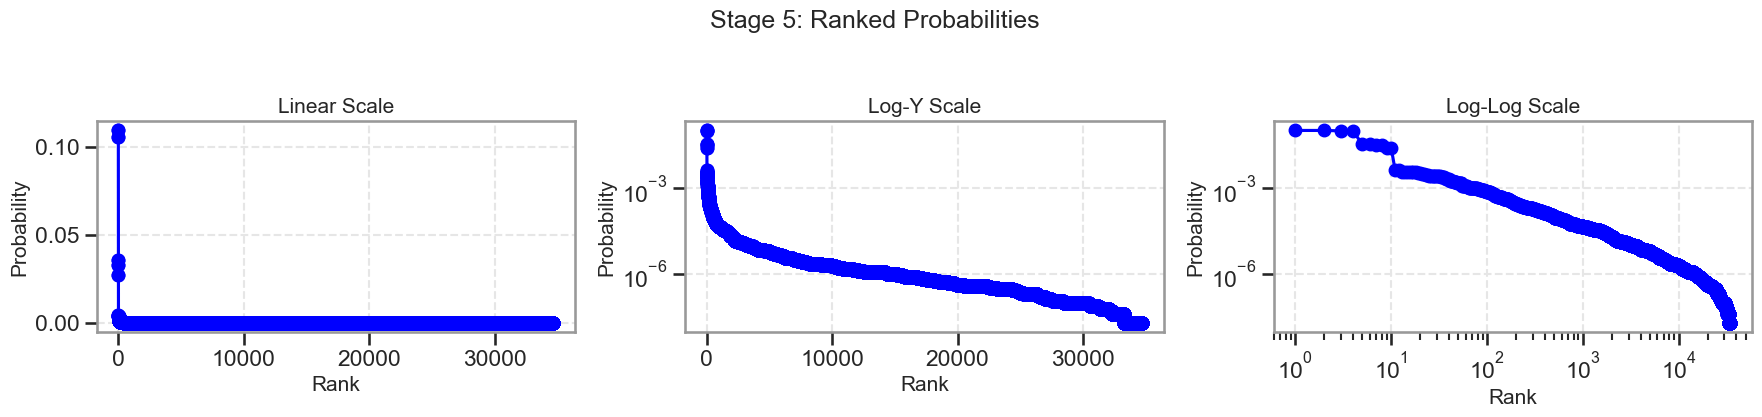

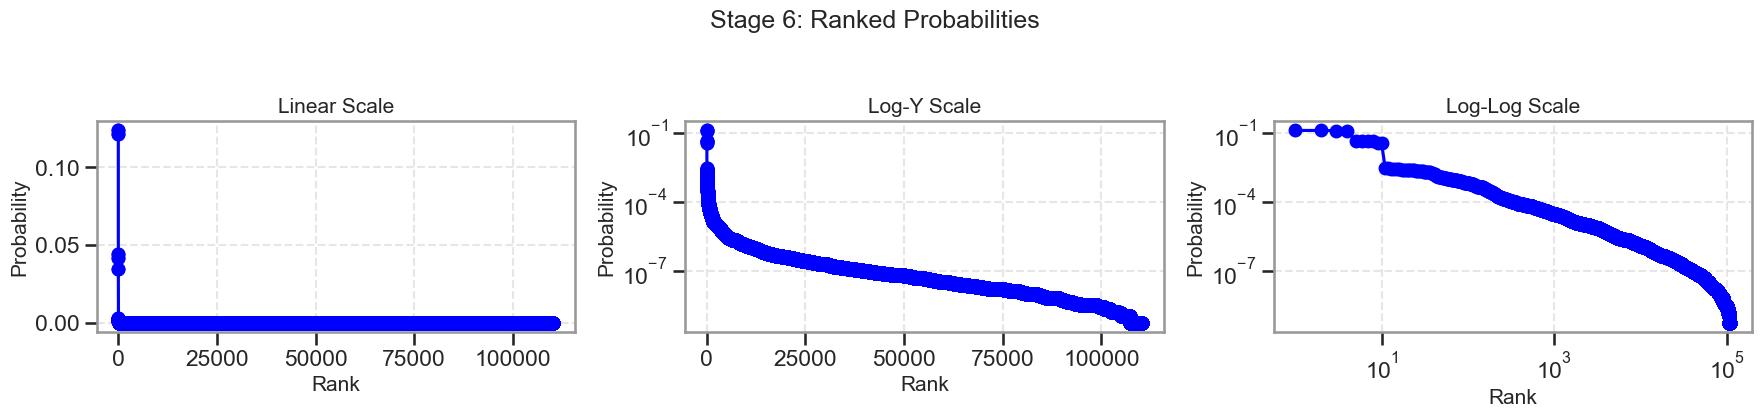

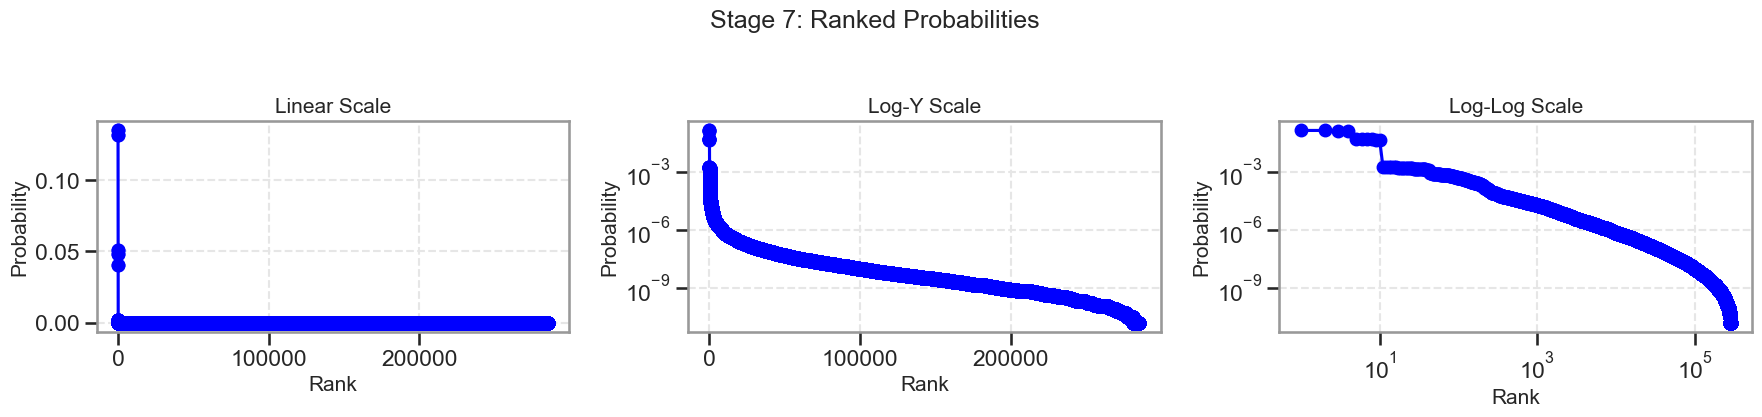

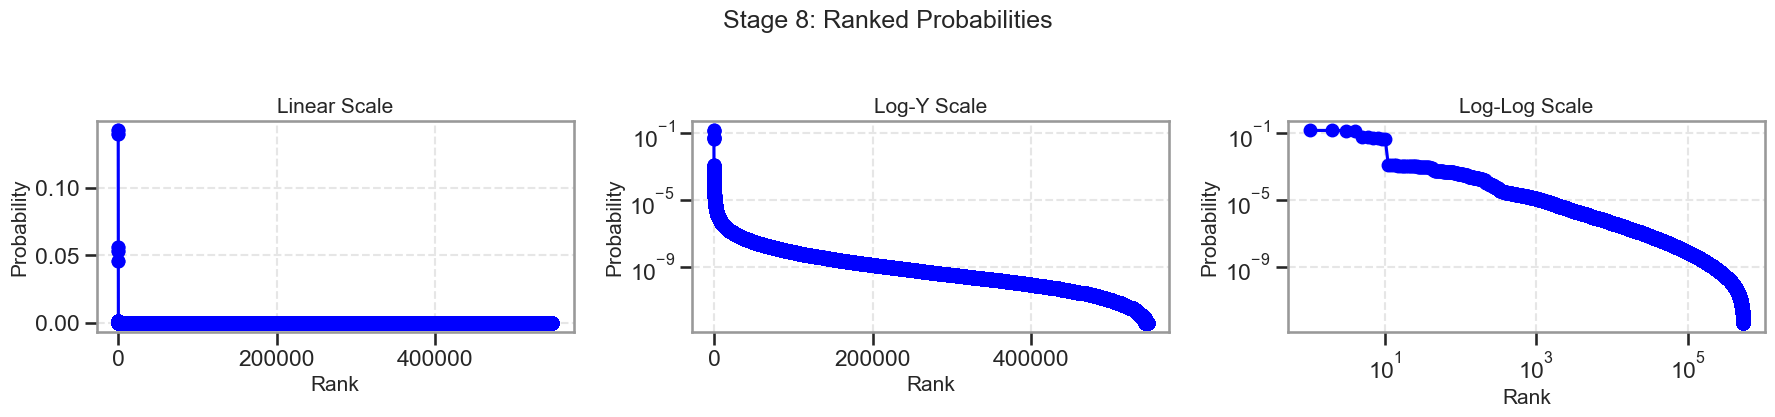

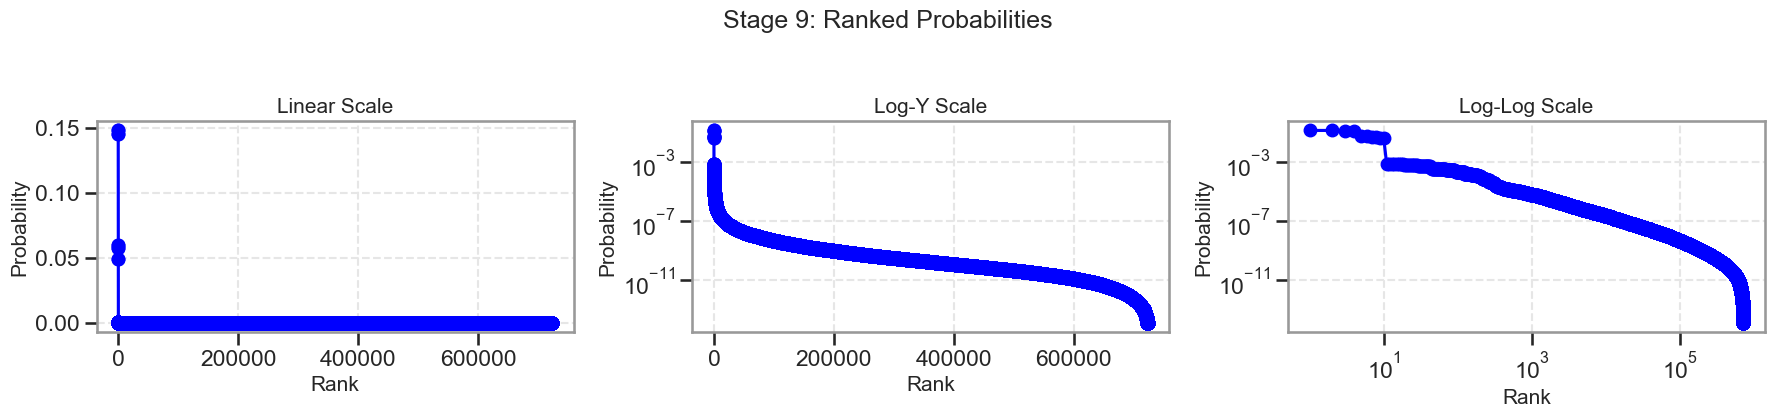

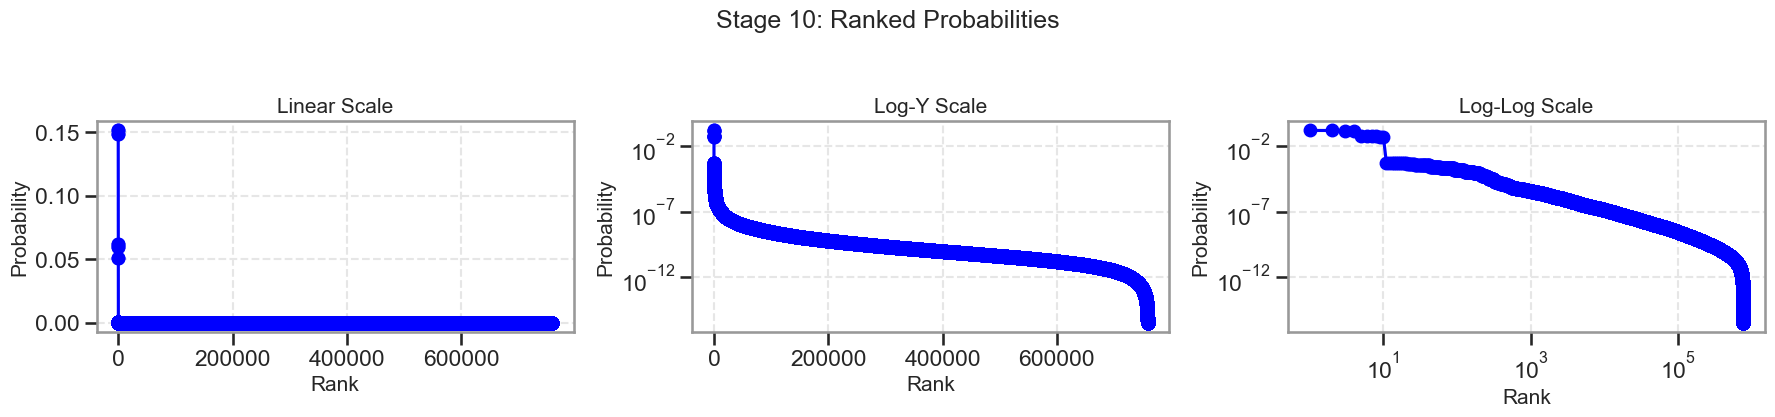

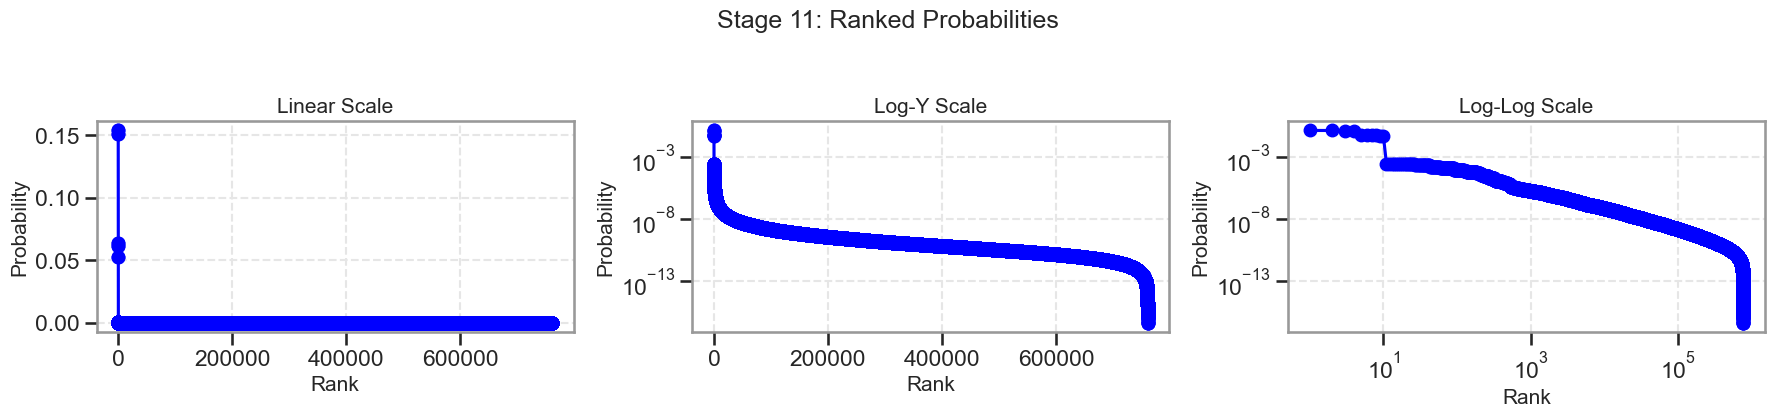

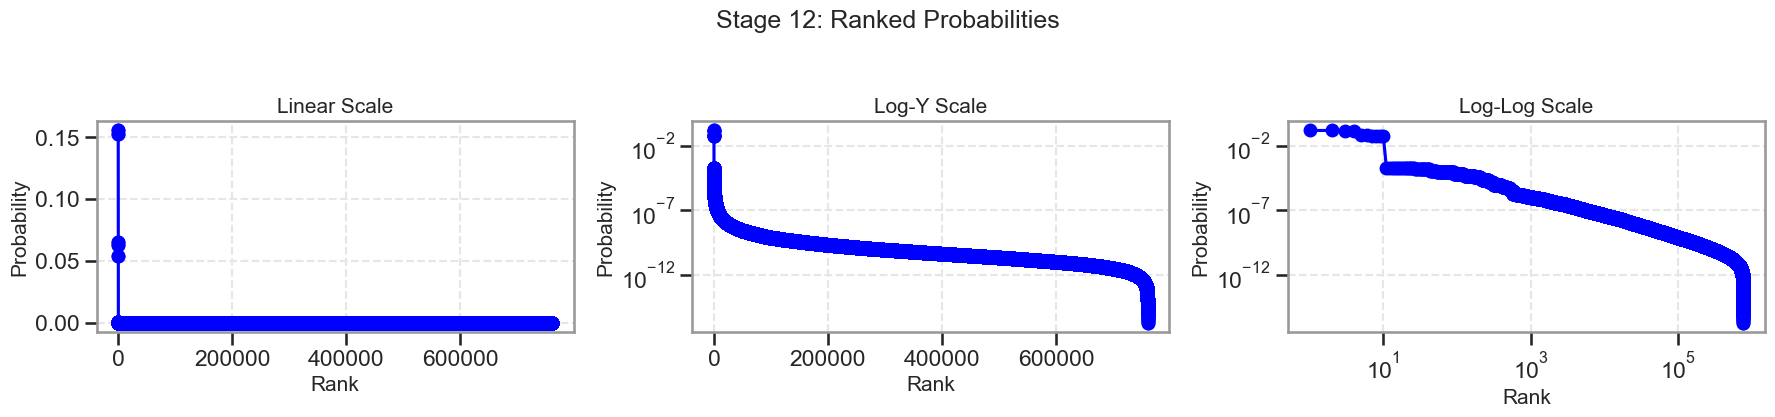

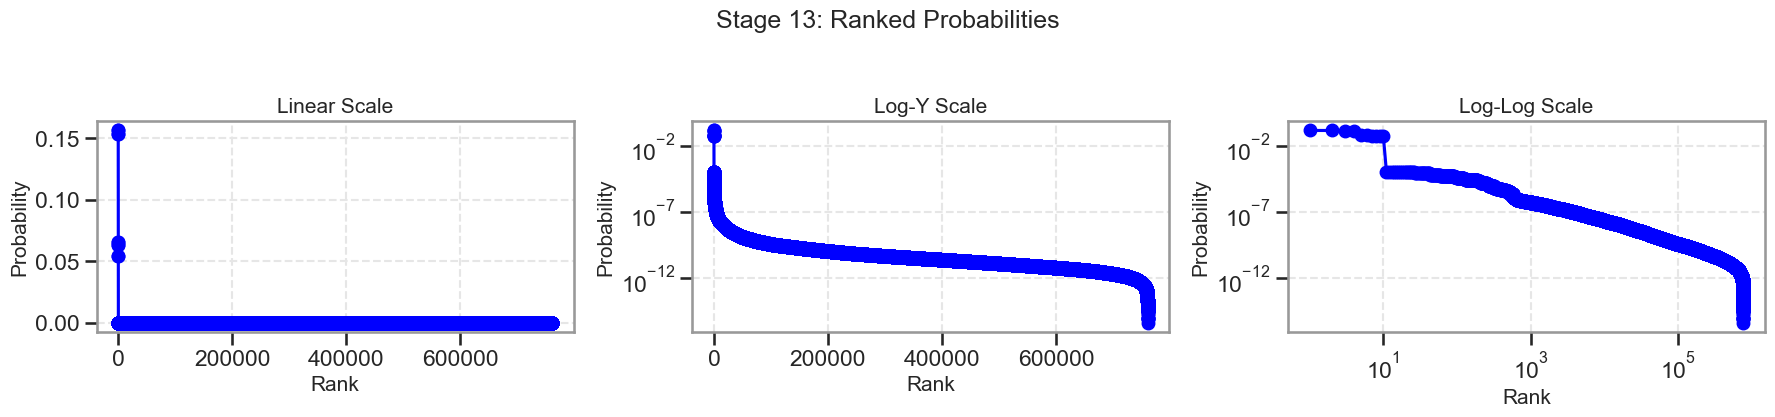

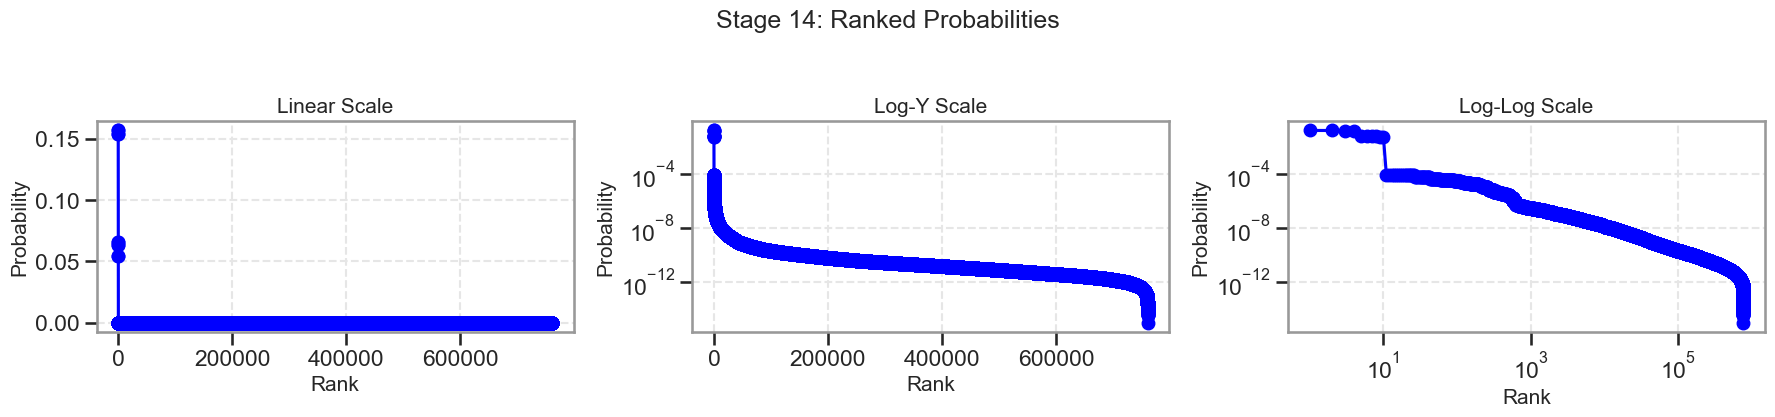

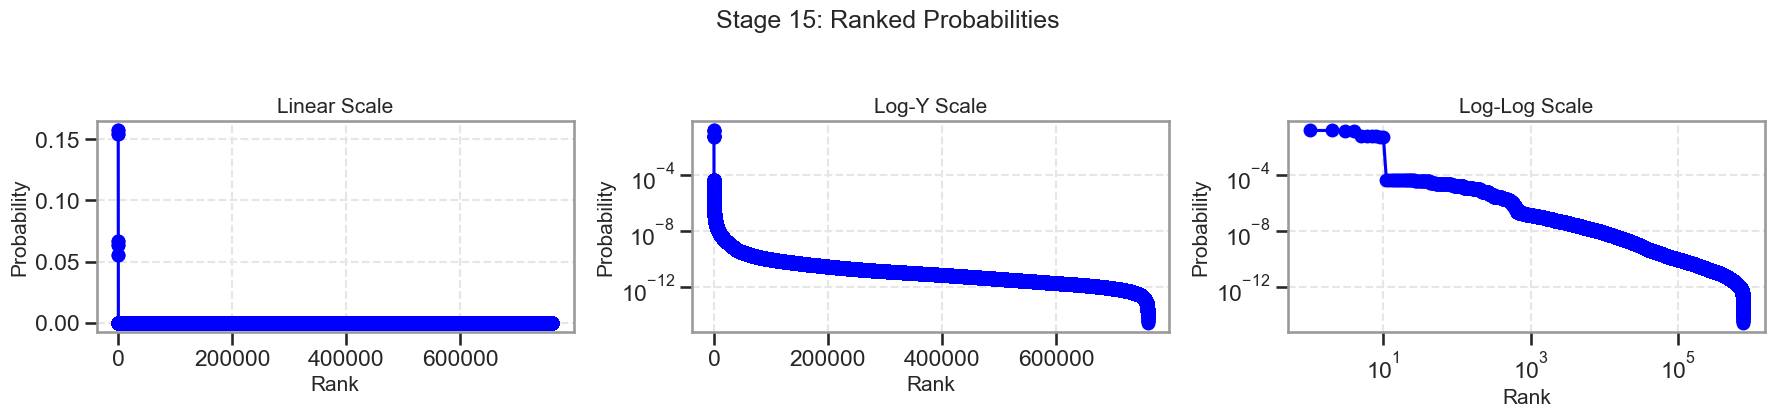

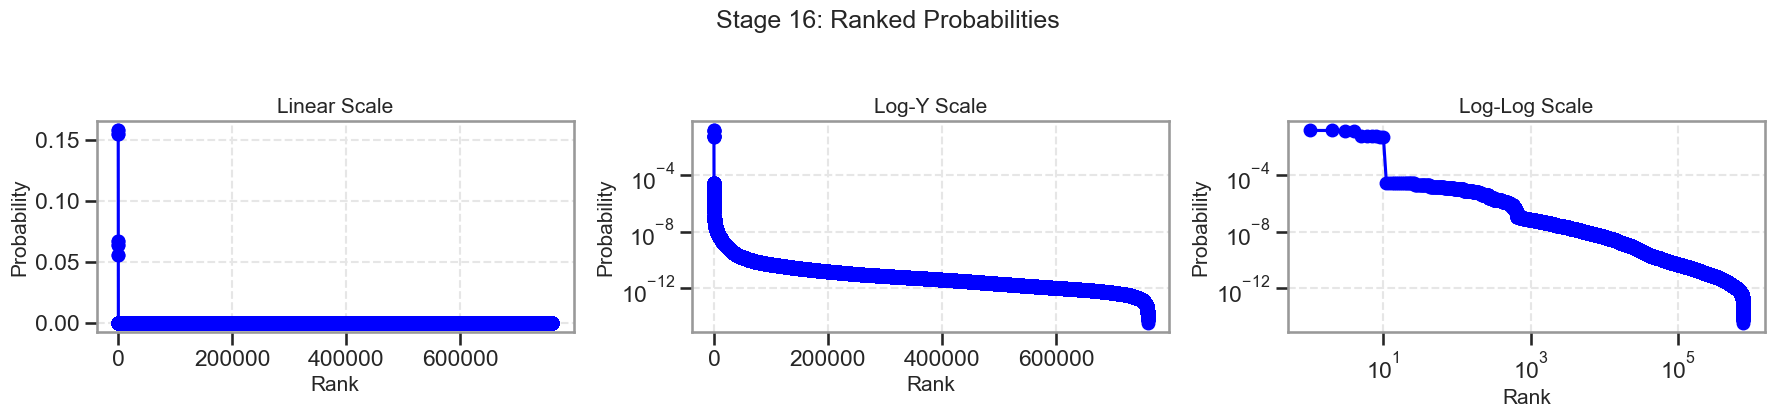

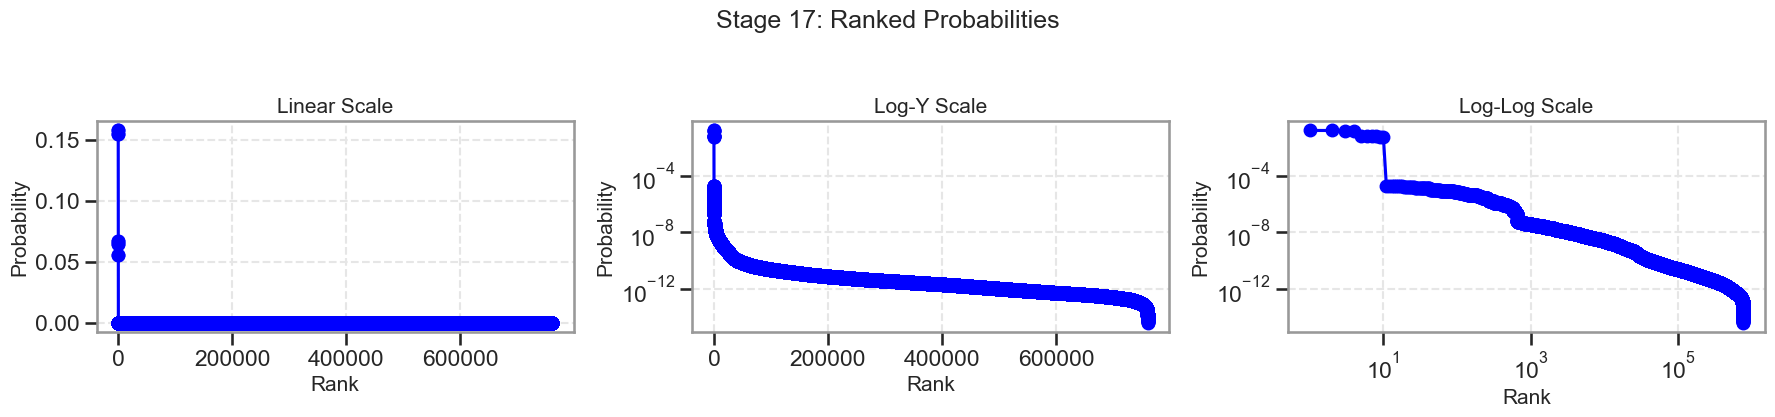

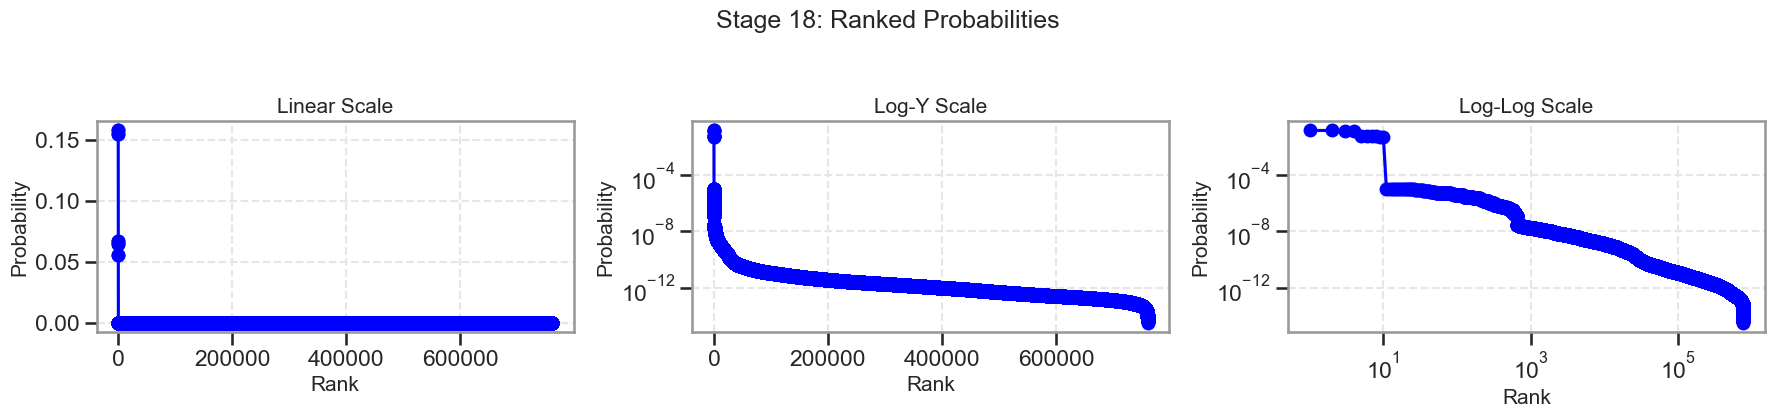

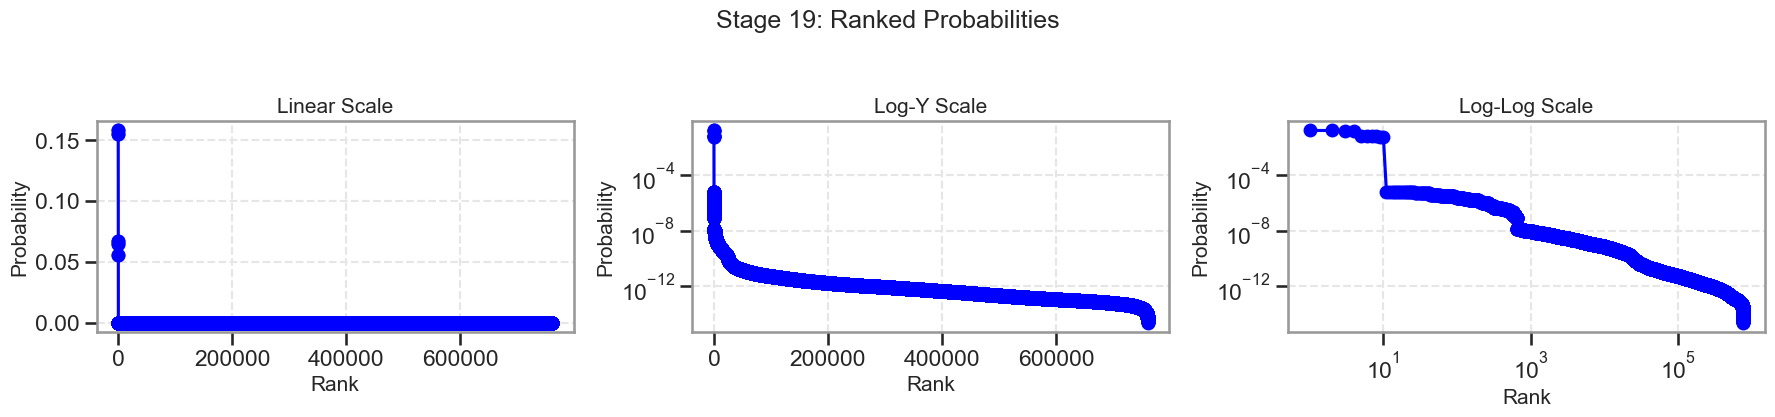

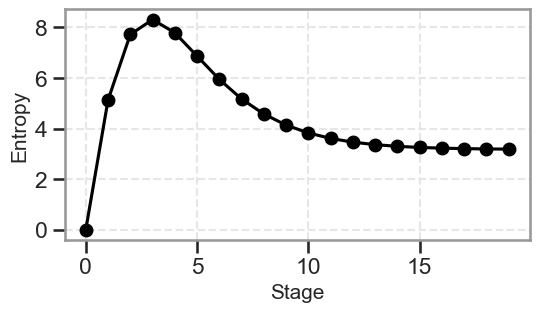

In [9]:
plot_probabilities(outcome_list, numberofevents=numberofevents)

In [10]:
#Just to get some numbers, ignore this part
probsum = 0
num_of_possible_outcomes = np.zeros(numberofevents)
total_num_of_outcomes = np.zeros(numberofevents)
entropy = np.zeros(numberofevents)
initial_dict=Counter()
for stage in range(numberofevents):
    probsum = np.sum(list(outcome_list[stage].values()))
    if (probsum-1)> 0.01 or (probsum-1)<-0.01:
        raise ValueError(f"Stage {stage} does not sum to 1, it sums to {probsum}. Please check the input data or the calculation logic.")
    entropy[stage] = -np.sum([p * np.log2(p) for p in outcome_list[stage].values() if p > 0])
    num_of_possible_outcomes[stage] = len(outcome_list[stage])
    initial_dict.update(outcome_list[stage])
    total_num_of_outcomes[stage] = len(initial_dict)



In [11]:
np.sum(num_of_possible_outcomes)

9319557.0

In [12]:
total_num_of_outcomes[-1]

1129610.0